In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.models as models

import numpy as np
import matplotlib.pyplot as plt
import math
from graphviz import Digraph
import re

% matplotlib inline

CUDA = False

In [5]:
class CausalConv1d(nn.Conv1d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, dilation=1, groups=1, bias=True):
        super(CausalConv1d, self).__init__(in_channels, out_channels, kernel_size, stride=stride, padding=0,
            dilation=dilation, groups=groups, bias=bias)

        self.left_padding = dilation * (kernel_size - 1)
#         self.weight = init.xavier_uniform(self.weight, gain=np.sqrt(2))
#         self.bias = init.constant(self.bias, 0.1)

    def forward(self, input):
        temp = torch.unsqueeze(input, 0)
        x = F.pad(temp, (self.left_padding, 0, 0, 0))
        x = torch.squeeze(x, 0)
        
        return super(CausalConv1d, self).forward(x)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = CausalConv1d(1, 1, 2, dilation = 512)
        self.conv2 = CausalConv1d(1, 1, 2, dilation = 256)
        self.conv3 = CausalConv1d(1, 1, 2, dilation = 128)
        self.conv4 = CausalConv1d(1, 1, 2, dilation = 64)
        self.conv5 = CausalConv1d(1, 1, 2, dilation = 32)
        self.conv6 = CausalConv1d(1, 1, 2, dilation = 16)
        self.conv7 = CausalConv1d(1, 1, 2, dilation = 8)
        self.conv8 = CausalConv1d(1, 1, 2, dilation = 4)
        self.conv9 = CausalConv1d(1, 1, 2, dilation = 2)
        self.conv10 = CausalConv1d(1, 1, 2, dilation = 1)
        self.lin1 = nn.Tanh()
#         self.lin1 = nn.ReLU()
        self.oneone = nn.Conv1d(1, 1, 1)
    
    def forward(self, x):

        x = self.conv10(x)
        x = self.lin1(x)
#         y = self.lin2(x)
        x = self.conv9(x)
        x = self.lin1(x)
#         y = self.lin2(x)
        x = self.conv8(x)
        x = self.lin1(x)
#         y = self.lin2(x)
        x = self.conv7(x)
        x = self.lin1(x)
#         y = self.lin2(x)
        x = self.conv6(x)
        x = self.lin1(x)
#         y = self.lin2(x)
        x = self.conv5(x)
        x = self.lin1(x)
#         y = self.lin2(x)
        x = self.conv4(x)
        x = self.lin1(x)
        x = self.oneone(x)
        return x

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv10 = CausalConv1d(1, 1, 2, dilation = 512)
        self.conv9 = CausalConv1d(1, 1, 2, dilation = 256)
        self.conv8 = CausalConv1d(1, 1, 2, dilation = 128)
        self.conv7 = CausalConv1d(1, 1, 2, dilation = 64)
        self.conv6 = CausalConv1d(1, 1, 2, dilation = 32)
        self.conv5 = CausalConv1d(1, 1, 2, dilation = 16)
        self.conv4 = CausalConv1d(1, 1, 2, dilation = 8)
        self.conv3 = CausalConv1d(1, 1, 2, dilation = 4)
        self.conv2 = CausalConv1d(1, 1, 2, dilation = 2)
        self.conv1 = CausalConv1d(1, 1, 2, dilation = 1)
        self.Tanh = nn.Tanh()
        self.ReLU = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
        self.oneone = nn.Conv1d(1, 1, 1)
        self.LogSoftmax = nn.LogSoftmax(1)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.ReLU(x)
        x = self.conv2(x)
        x = self.ReLU(x)
        x = self.conv3(x)
        x = self.ReLU(x)
        x = self.conv4(x)
        x = self.ReLU(x)
        x = self.conv5(x)
        x = self.ReLU(x)
        x = self.conv6(x)
        x = self.ReLU(x)
        x = self.conv7(x)
        x = self.ReLU(x)
        x = self.conv8(x)
        x = self.ReLU(x)
        x = self.conv9(x)
        x = self.oneone(x)

#         x5 = self.conv5(resAdd3)
#         t5 = self.Tanh(x5)
#         s5 = self.Sigmoid(x5)
#         oneone5 = self.oneone(t5 * s5)
#         resAdd4 = oneone5 + oneone4
         
#         x6 = self.conv6(resAdd4)
#         t6 = self.Tanh(x6)
#         s6 = self.Sigmoid(x6)
#         oneone6 = self.oneone(t6 * s6)
#         resAdd5 = oneone6 + oneone5
       
#         x7 = self.conv7(resAdd5)
#         t7 = self.Tanh(x7)
#         s7 = self.Sigmoid(x7)
#         oneone7 = self.oneone(t7 * s7)
#         resAdd6 = oneone7 + oneone6
        
#         x8 = self.conv8(resAdd6)
#         t8 = self.Tanh(x8)
#         s8 = self.Sigmoid(x8)
#         oneone8 = self.oneone(t8 * s8)
#         resAdd7 = oneone8 + oneone7
        
#         x9 = self.conv9(resAdd7)
#         t9 = self.Tanh(x9)
#         s9 = self.Sigmoid(x9)
#         oneone9 = self.oneone(t9 * s9)
#         resAdd8 = oneone9 + oneone8
        
#         x10 = self.conv10(resAdd8)
#         t10 = self.Tanh(x10)
#         s10 = self.Sigmoid(x10)
#         oneone10 = self.oneone(t10 * s10)
#         resAdd9 = oneone10 + oneone9
        
        #x = oneone2 + oneone3 + oneone4 #+ oneone5 + oneone6 + oneone7 + oneone8 + oneone9 + oneone10

#         x = self.ReLU(x)
#         x = self.oneone(x)
#         x = self.ReLU(x)
#         x = self.oneone(x)
#         x = self.LogSoftmax(x)

        return x

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv10 = CausalConv1d(1, 1, 2, dilation = 512)
        self.conv9 = CausalConv1d(1, 1, 2, dilation = 256)
        self.conv8 = CausalConv1d(1, 1, 2, dilation = 128)
        self.conv7 = CausalConv1d(1, 1, 2, dilation = 64)
        self.conv6 = CausalConv1d(1, 1, 2, dilation = 32)
        self.conv5 = CausalConv1d(1, 1, 2, dilation = 16)
        self.conv4 = CausalConv1d(1, 1, 2, dilation = 8)
        self.conv3 = CausalConv1d(1, 1, 2, dilation = 4)
        self.conv2 = CausalConv1d(1, 1, 2, dilation = 2)
        self.conv1 = CausalConv1d(1, 1, 2, dilation = 1)
        self.Tanh = nn.Tanh()
        self.ReLU = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
        self.oneone = nn.Conv1d(1, 1, 1)
        self.LogSoftmax = nn.LogSoftmax(1)
    
    def forward(self, x):
        x1 = self.conv1(x)
      
        x2 = self.conv2(x1)
        t2 = self.Tanh(x2)
        s2 = self.Sigmoid(x2)
        oneone2 = self.oneone(t2 * s2) 
        resAdd1 = oneone2 + x1
        
        x3 = self.conv3(resAdd1)
        t3 = self.Tanh(x3)
        s3 = self.Sigmoid(x3)
        oneone3 = self.oneone(t3 * s3)
        resAdd2 = oneone3 + oneone2
        
        x4 = self.conv4(resAdd2)
        t4 = self.Tanh(x4)
        s4 = self.Sigmoid(x4)
        oneone4 = self.oneone(t4 * s4)
        resAdd3 = oneone4 + oneone3
        
        x5 = self.conv5(resAdd3)
        t5 = self.Tanh(x5)
        s5 = self.Sigmoid(x5)
        oneone5 = self.oneone(t5 * s5)
        resAdd4 = oneone5 + oneone4
         
        x6 = self.conv6(resAdd4)
        t6 = self.Tanh(x6)
        s6 = self.Sigmoid(x6)
        oneone6 = self.oneone(t6 * s6)
        resAdd5 = oneone6 + oneone5
       
        x7 = self.conv7(resAdd5)
        t7 = self.Tanh(x7)
        s7 = self.Sigmoid(x7)
        oneone7 = self.oneone(t7 * s7)
        resAdd6 = oneone7 + oneone6
        
        x8 = self.conv8(resAdd6)
        t8 = self.Tanh(x8)
        s8 = self.Sigmoid(x8)
        oneone8 = self.oneone(t8 * s8)
        resAdd7 = oneone8 + oneone7
        
        x9 = self.conv9(resAdd7)
        t9 = self.Tanh(x9)
        s9 = self.Sigmoid(x9)
        oneone9 = self.oneone(t9 * s9)
        resAdd8 = oneone9 + oneone8
        
        x10 = self.conv10(resAdd8)
        t10 = self.Tanh(x10)
        s10 = self.Sigmoid(x10)
        oneone10 = self.oneone(t10 * s10)
        resAdd9 = oneone10 + oneone9
        
        x = oneone2 + oneone3 + oneone4 + oneone5 + oneone6 + oneone7 + oneone8 + oneone9 + oneone10

        x = self.ReLU(x)
        x = self.oneone(x)
        x = self.ReLU(x)
        x = self.oneone(x)
        x = self.LogSoftmax(x)

        return x

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = CausalConv1d(1, 1, 2, dilation = 512)
        self.conv2 = CausalConv1d(1, 1, 2, dilation = 256)
        self.conv3 = CausalConv1d(1, 1, 2, dilation = 128)
        self.conv4 = CausalConv1d(1, 1, 2, dilation = 64)
        self.conv5 = CausalConv1d(1, 1, 2, dilation = 32)
        self.conv6 = CausalConv1d(1, 1, 2, dilation = 16)
        self.conv7 = CausalConv1d(1, 1, 2, dilation = 8)
        self.conv8 = CausalConv1d(1, 1, 2, dilation = 4)
        self.conv9 = CausalConv1d(1, 1, 2, dilation = 2)
        self.conv10 = CausalConv1d(1, 1, 2, dilation = 1)
        self.Tanh = nn.Tanh()
        self.ReLU = nn.ReLU()
        self.Sigmoid = nn.Sigmoid()
        self.oneone = nn.Conv1d(1, 1, 1)
        self.LogSoftmax = nn.LogSoftmax(1)
    

    
    def forward(self, x):
        
        def CreateNetwork(x1, one):
            t1 = self.Tanh(x1)
            s1 = self.Sigmoid(x1)
            oneone = self.oneone(t1 * s1)
            resAdd = oneone + one

            return resAdd, oneone
        
        x1 = self.conv10(x)
      
        x2 = self.conv9(x1)
        res1, one1 = CreateNetwork(x2, x1)
        x3 = self.conv8(res1)
        res2, one2 = CreateNetwork(x3, one1)
        x4 = self.conv7(res2)
        res3, one3 = CreateNetwork(x4, one2)
        x5 = self.conv6(res3)
        res4, one4 = CreateNetwork(x5, one3)
        x6 = self.conv5(res4)
        res5, one5 = CreateNetwork(x6, one4)
        x7 = self.conv4(res5)
        res6, one6 = CreateNetwork(x7, one5)
        x8 = self.conv3(res6)
        res7, one7 = CreateNetwork(x8, one6)
        x9 = self.conv2(res7)
        res8, one8 = CreateNetwork(x9, one7)
        x10 = self.conv1(res8)
        _, one9 = CreateNetwork(x10, one8)
        
        x = one1 + one2 + one3 + one4 + one5 + one6 + one7 + one8 + one9

        x = self.ReLU(x)
        x = self.oneone(x)
        x = self.ReLU(x)
        x = self.oneone(x)
        x = self.LogSoftmax(x)

        return x

In [7]:
Network = Net()

if (torch.cuda.is_available() and CUDA):
    Network.cuda()
    print('CUDA Enabled; Running on GPU')
    
print(Network)

Net(
  (conv1): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(512,))
  (conv2): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(256,))
  (conv3): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(128,))
  (conv4): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(64,))
  (conv5): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(32,))
  (conv6): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(16,))
  (conv7): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(8,))
  (conv8): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(4,))
  (conv9): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,), dilation=(2,))
  (conv10): CausalConv1d (1, 1, kernel_size=(2,), stride=(1,))
  (lin1): Tanh()
  (oneone): Conv1d (1, 1, kernel_size=(1,), stride=(1,))
)


# Generate data

In [8]:
def batch_generator():
    while True:
        xs = np.linspace(0, np.pi*10, 4000)
        ys = np.sin(xs) + np.random.rand(4000)*0.2-0.1
        ys = ys.astype(np.float32) # default is np.float64
        x = torch.from_numpy(ys[:3999]).view(1,1,-1)
        y = torch.from_numpy(ys[1:4000]).view(1,1,-1)
        if (torch.cuda.is_available() and CUDA):
            x = x.cuda()
            y = y.cuda()
            
        yield Variable(x), Variable(y)

g = batch_generator()

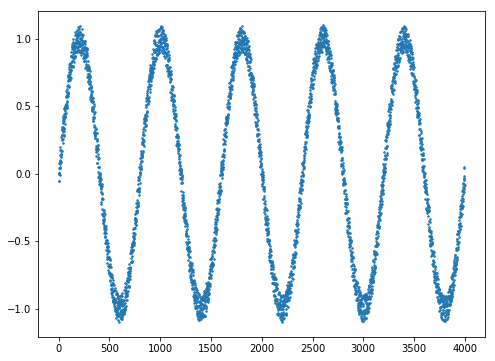

In [9]:
x, _ = next(g)
plt.figure(figsize=[8,6])
plt.plot(x.cpu().data.numpy()[0][0],'.', ms=3)

# Training

In [18]:
max_epoch = 10000
# lr = 2e-3
loss_save = []

# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.Adam(Network.parameters(), lr=0.001)

for epoch in range(max_epoch):
    inputs, target = next(g)
    
    optimizer.zero_grad()
    output = Network(inputs)
    
    loss = ((output-target)**2).mean() #criterion(output, target)
    loss.backward()
#     torch.nn.utils.clip_grad_norm(Network.parameters(), 0.002)
    optimizer.step()
    
    loss_save.append(loss.data[0])
    if epoch%1000 == 0:
        print('epoch {}, loss {:3.4g}'.format(epoch, loss.data[0]))
        
#     if epoch%15000 == 0:
#         lr *= 0.1
#         optimizer = optim.Adam(Network.parameters(), lr)

epoch 0, loss 0.003759
epoch 1000, loss 0.003769
epoch 2000, loss 0.00371
epoch 3000, loss 0.003839
epoch 4000, loss 0.003672
epoch 5000, loss 0.003719
epoch 6000, loss 0.003717
epoch 7000, loss 0.003694
epoch 8000, loss 0.003759
epoch 9000, loss 0.003715


(0, 10000)

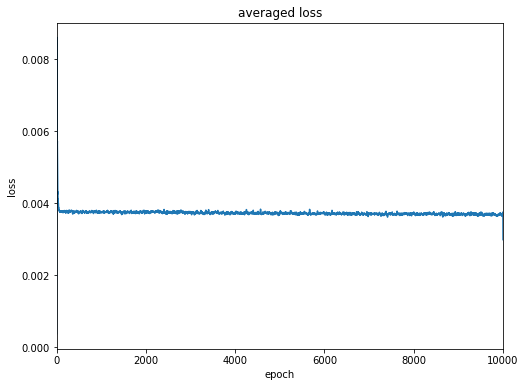

In [19]:
plt.figure(figsize=[8,6])
plt.plot(np.convolve(loss_save, np.ones(10)/10))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('averaged loss')
plt.xlim([0,10000])

# Predict from test batch

In [20]:
x, _ = next(g)
x = x.cpu().data.numpy()
n = 5000

predict_save = []
for _ in range(n):
    inputs = Variable(torch.from_numpy(x))
    
    if (torch.cuda.is_available() and CUDA):
        inputs = inputs.type(torch.cuda.FloatTensor)
    
    predict = Network(inputs)
    
    predict_save.append(predict.data[0][0][-1])
    x = np.roll(x, -1, axis=2)
    x[0][0][-1] = predict.data[0][0][-1]

(0, 5000)

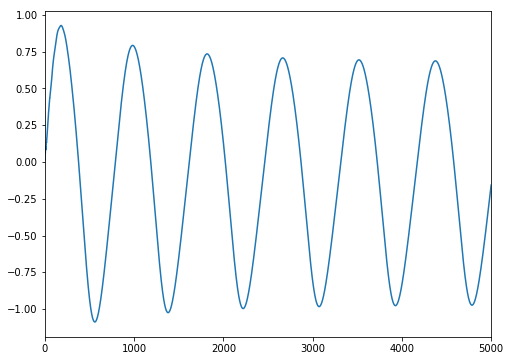

In [21]:
plt.figure(figsize=[8,6])
plt.plot(predict_save)
plt.xlim([0, 5000])

# Predict from random input

In [22]:
x = np.random.rand(1,1,1000).astype(np.float32)
n = 5000

predict_save = []
for _ in range(n):
    inputs = Variable(torch.from_numpy(x))
    
    if (torch.cuda.is_available() and CUDA):
        inputs = inputs.type(torch.cuda.FloatTensor)
    
    predict = Network(inputs)
    predict_save.append(predict.data[0][0][-1])
    x = np.roll(x, -1, axis=2)
    x[0][0][-1] = predict.data[0][0][-1]

(0, 5000)

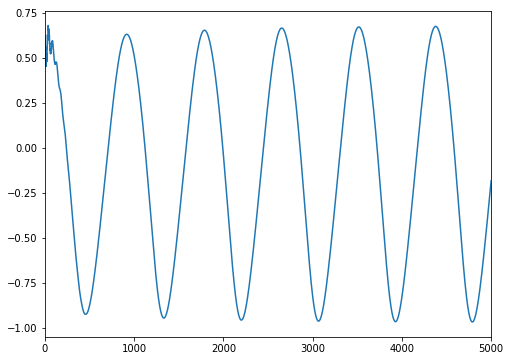

In [23]:
plt.figure(figsize=[8,6])
plt.plot(predict_save)
plt.xlim([0,5000])

# Generate Network Graph

In [ ]:
def make_dot(var, params=None):
    """ Produces Graphviz representation of PyTorch autograd graph
    Blue nodes are the Variables that require grad, orange are Tensors
    saved for backward in torch.autograd.Function
    Args:
        var: output Variable
        params: dict of (name, Variable) to add names to node that
            require grad (TODO: make optional)
    """
    if params is not None:
        assert isinstance(params.values()[0], Variable)
        param_map = {id(v): k for k, v in params.items()}

    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()

    def size_to_str(size):
        return '('+(', ').join(['%d' % v for v in size])+')'

    def add_nodes(var):
        if var not in seen:
            if torch.is_tensor(var):
                dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
            elif hasattr(var, 'variable'):
                u = var.variable
                name = param_map[id(u)] if params is not None else ''
                node_name = '%s\n %s' % (name, size_to_str(u.size()))
                dot.node(str(id(var)), node_name, fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'next_functions'):
                for u in var.next_functions:
                    if u[0] is not None:
                        dot.edge(str(id(u[0])), str(id(var)))
                        add_nodes(u[0])
            if hasattr(var, 'saved_tensors'):
                for t in var.saved_tensors:
                    dot.edge(str(id(t)), str(id(var)))
                    add_nodes(t)
    add_nodes(var.grad_fn)
    return dot

In [ ]:
x, _ = next(g)
x = x.cpu().data.numpy()

inputs = Variable(torch.from_numpy(x))

if (torch.cuda.is_available() and CUDA):
    inputs = inputs.type(torch.cuda.FloatTensor)
    
out = Network(inputs)

In [ ]:
graph = make_dot(out)
graph.view()